## scikit -predict

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pylab as pl
import sys, os
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 
import matplotlib.pyplot as plt 
import pylab as pl 
import sys, os 
from sklearn import svm 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler

In [2]:

xls = pd.ExcelFile('Mesotheliomadataset.xlsx')
mesodata = xls.parse("Data")
meso_DFnew = pd.DataFrame(mesodata)
meso_meso = meso_DFnew
meso_DFnew.head()
meso_meso.tail()

,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,diagnosis method,keep side,cytology,duration of symptoms,...,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),class of diagnosis
319,75.0,1,1,1,0.0,50.0,1,1,0,9.0,...,323.0,4.9,2.6,23.0,1,1.0,1.0,0.0,76,1
320,66.0,1,1,1,0.0,41.0,1,1,0,9.0,...,323.0,4.9,2.6,23.0,1,1.0,1.0,0.0,67,1
321,58.0,1,6,1,0.0,40.0,1,0,0,8.0,...,300.0,5.1,2.2,35.0,1,1.0,0.0,1.0,68,1
322,42.0,1,6,0,0.0,0.0,0,1,0,2.0,...,3000.0,2.4,1.2,2.0,1,1.0,1.0,0.0,78,2
323,54.0,1,0,1,0.0,40.0,1,1,0,3.0,...,2100.0,5.7,3.3,35.0,1,1.0,1.0,0.0,45,1


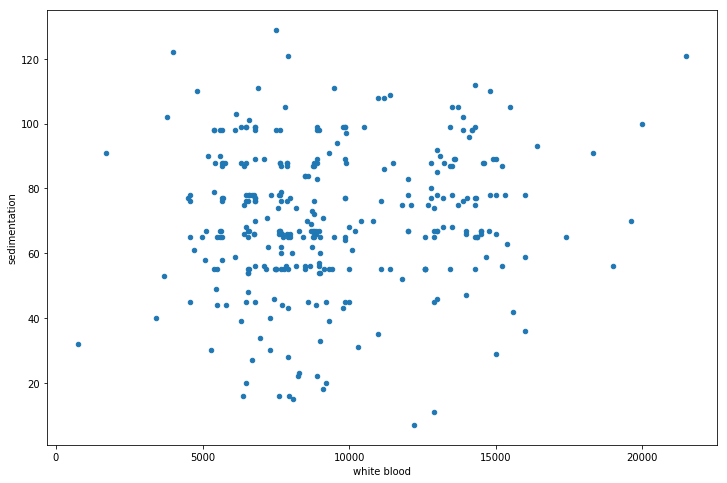

In [3]:
meso_DFnew.plot.scatter(x= 'white blood', y = 'sedimentation',figsize=(12,8))


[3968406152.577096, 1079457775.0320923, 663698245.3737063, 487955988.617478, 373297173.5414274, 287263175.06329525, 238867406.4490974, 199763052.97942036, 175101381.52586478]


Text(0,0.5,'sum of squared errors')

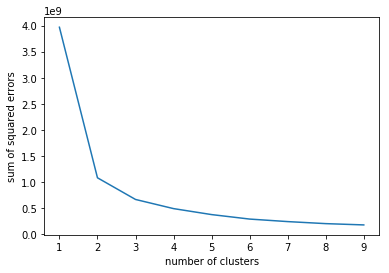

In [4]:
#the elbow method

sum_of_squared_errors = {} 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(meso_DFnew)
    kmeans.labels_
    sum_of_squared_errors[k] = kmeans.inertia_
sum_of_squared_errors[k] #Sum of distances of samples to their closest cluster center
print(sum_of_squared_errors.values())
plt.figure()
plt.plot(list(sum_of_squared_errors.keys()), list(sum_of_squared_errors.values()))
plt.xlabel("number of clusters")
plt.ylabel("sum of squared errors")

In [5]:
#silhoutte technique
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(meso_DFnew)
    label = kmeans.labels_
    sil_coeff = silhouette_score(meso_DFnew, label, metric='euclidean')
    print("clusters={},silhouette coefficient:{} ".format(n_cluster, sil_coeff))

clusters=2,silhouette coefficient:0.668454912759 
clusters=3,silhouette coefficient:0.541818156751 
clusters=4,silhouette coefficient:0.542190780333 
clusters=5,silhouette coefficient:0.49670231656 
clusters=6,silhouette coefficient:0.476805296223 
clusters=7,silhouette coefficient:0.477880420125 
clusters=8,silhouette coefficient:0.456153845974 
clusters=9,silhouette coefficient:0.463394003018 
clusters=10,silhouette coefficient:0.464110216773 


In [10]:
meso_DFnew = meso_DFnew.drop(columns = "class of diagnosis")
meso_DFnew.head()

KeyError: "['class of diagnosis'] not found in axis"

In [11]:
kmeans = KMeans(n_clusters=2, init = 'random', max_iter = 100, random_state = 5).fit(meso_DFnew)
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(meso_DFnew.columns.values))

centroids_df

label_unclustered = kmeans.labels_

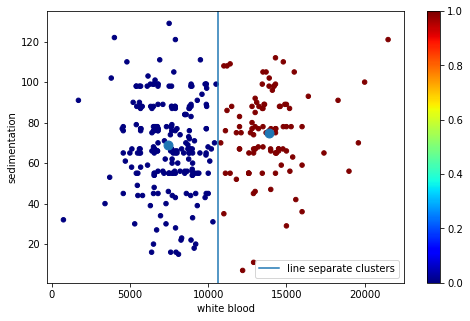

In [12]:
fig, ax = plt.subplots(1, 1)
meso_DFnew.plot.scatter( x= 'white blood', y = 'sedimentation', c= kmeans.labels_, figsize=(8,5), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter( x= 'white blood', y = 'sedimentation', ax = ax,  s = 80, mark_right=False)
xcord = (centroids_df["white blood"][1] + centroids_df["white blood"][0])/2
ycord = (centroids_df["sedimentation"][1] + centroids_df["sedimentation"][0])/2
plt.axvline(x=xcord, label="line separate clusters")
plt.xlabel('white blood')
plt.ylabel('sedimentation')
plt.legend(loc='lower right')

#plt.grid()
plt.show()
fig.savefig('/home/antara/Documents/researchproject/HDoutputs/kmeanscluster.png',bbox_inches='tight')

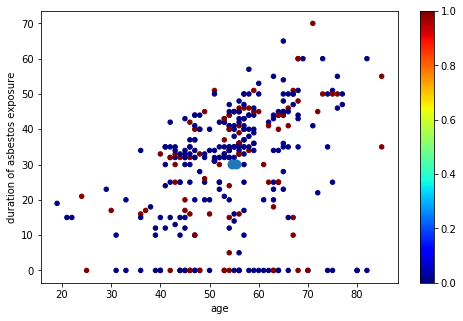

In [13]:
fig, ax = plt.subplots(1, 1)
meso_DFnew.plot.scatter( x= 'age', y = 'duration of asbestos exposure', c= kmeans.labels_, figsize=(8,5), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter( x= 'age', y = 'duration of asbestos exposure', ax = ax,  s = 80, mark_right=False)
fig.savefig('/home/antara/Documents/researchproject/HDoutputs/kmeansoverlap.png',bbox_inches='tight')

In [14]:
# !! Get the indices of the points for each corresponding cluster
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

dictlist = []
for key, value in mydict.iteritems():
    temp = [key,value]
    dictlist.append(temp)
#print(dictlist)    

In [15]:
print("Shape of cluster:", kmeans.cluster_centers_.shape)
coef_df = pd.DataFrame(kmeans.cluster_centers_, columns = meso_DFnew.columns.values)
#print("\nDataFrame containg each cluster points with feature names:\n", coef_df)



('Shape of cluster:', (2, 34))


In [16]:
y = kmeans.predict(meso_DFnew)
x = meso_DFnew
scaler = StandardScaler()
x = scaler.fit_transform(x)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)


In [18]:
clf = svm.SVC(kernel='linear', C=1E10)
clf.fit(X_train, y_train)



SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

predicted = clf.predict(X_test)

# get the accuracy
print accuracy_score(predicted,y_test)
print metrics.adjusted_mutual_info_score(predicted, y_test)
print metrics.adjusted_rand_score(predicted, y_test)  
print metrics.homogeneity_score(predicted, y_test)  
print confusion_matrix(predicted, y_test)


0.9692307692307692
0.7587773921446384
0.871031746032
0.762306889229868
[[48  1]
 [ 1 15]]


/usr/local/lib/python2.7/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


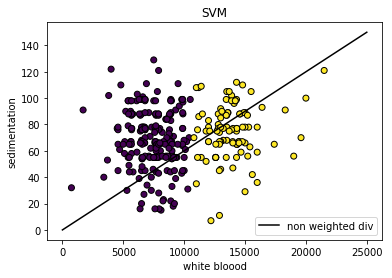

<Figure size 432x288 with 0 Axes>

In [21]:
w = clf.coef_[0]


a = -w[0] / w[1]
xx = np.linspace(0,25000)
#yy = a * xx - clf.intercept_[0] / w[1]
yy = np.linspace(0,150)


h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

#sklearn

plt.scatter(meso_DFnew["white blood"], meso_DFnew["sedimentation"],c = y, edgecolors='k',label='_nolegend_')
 
plt.title("SVM")
plt.xlabel("white bloood")
plt.ylabel("sedimentation");

plt.legend(loc="lower right")
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('/home/antara/Documents/researchproject/HDoutputs/svm-after-kmeans.png', dpi=100)

#plt.show()




In [25]:
meso_meso.head()

,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,diagnosis method,keep side,cytology,duration of symptoms,...,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),class of diagnosis
0,47.0,1,0,1,0.0,20.0,1,0,1,24.0,...,289.0,0.0,0.00,79.0,1,0.0,0.0,0.0,34,1
1,55.0,1,0,1,0.0,45.0,1,0,0,1.0,...,7541.0,1.6,0.80,6.0,1,1.0,1.0,1.0,42,1
2,29.0,1,1,1,0.0,23.0,0,1,0,1.0,...,480.0,0.0,0.00,90.0,1,0.0,0.0,0.0,43,2
3,39.0,1,0,1,0.0,10.0,1,0,0,3.0,...,459.0,5.0,2.80,45.0,1,1.0,0.0,0.0,21,1
4,47.0,1,0,1,0.0,10.0,1,1,1,1.5,...,213.0,3.6,1.95,53.0,1,1.0,0.0,0.0,11,1


In [26]:
from sklearn.metrics import confusion_matrix

In [162]:
meso_meso.iloc[:,-1]
label_unclustered


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [319]:
#meso_DFnew = meso_DFnew[:261]
kmeans = KMeans(n_clusters=1, init = 'random', max_iter = 100, random_state = 5).fit(meso_meso[261:])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(meso_meso[261:].columns.values))

centroids_df

label_with_classification = kmeans.labels_



In [320]:
label_unclustered[label_unclustered > 0] = 2
label_unclustered[label_unclustered < 1] = 1

In [321]:
label_with_classification[label_with_classification > 0] = 2
label_with_classification[label_with_classification < 1] = 1


In [322]:
meso = meso_meso[261:]

confusion_matrix(label_unclustered,meso.iloc[:,-1])


array([[ 0,  0],
       [50, 13]])

In [323]:

label_with_classification
meso = meso_meso[261:]
#meso.tail()



confusion_matrix(label_with_classification,meso.iloc[:,-1])

array([[50, 13],
       [ 0,  0]])

In [324]:
from sklearn import metrics
metrics.adjusted_mutual_info_score(label_with_classification,meso.iloc[:,-1])


4.906901164019235e-16

In [325]:
metrics.adjusted_rand_score(label_with_classification,meso.iloc[:,-1])  

0.0

In [326]:
metrics.homogeneity_score(label_with_classification,meso.iloc[:,-1])  

1.0